## Final Project Submission

* Student name: Festus Muchemi
* Student pace: Full time
* Scheduled project review date/time: 6/8/24
* Instructor name: Faith


# Aviation Risk Analysis Project


## 1. Introduction

### a) Project Overview

For this project, I will use data cleaning, imputation, analysis, and visualization to generate insights for the business stakeholders


### b) Business Problem

The company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I'm charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## 2. Data Understanding

### a) Dataset Overview

The <a href="https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data" target="_blank">dataset</a> is provided by the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

### b) Data Loading

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [2]:
# Determine the number of records in the dataset
num_records = df.shape[0]
print(f'The dataset contains {num_records} records.')

The dataset contains 90348 records.


In [3]:
# Preview the top of the dataset
print('Previewing the top of the dataset:')
df.head()

Previewing the top of the dataset:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Preview the bottom of the dataset
print('Previewing the bottom of the dataset:')
df.tail()

Previewing the bottom of the dataset:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
# Check whether each column has an appropriate datatype
print('Checking column datatypes:')
df.dtypes

Checking column datatypes:


Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [6]:
# Alternatively, provide a summary of the dataset including data types and missing values
print('Summary of the dataset:')
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make          

## 3. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

In [7]:
# Define the date range
start_date = '2020-01-01'
end_date = '2020-12-31'

# Filter the dataset for records within the date range
mask = (df['Event.Date'] >= start_date) & (df['Event.Date'] <= end_date)
filtered_df = df[mask]

# External source data (example values, these should be obtained from a reliable external source)
# Let's assume the external source reports 50 aviation accidents in the year 2020
external_accidents_2020 = 0

# Extract the number of accidents in 2020 from your dataset
internal_accidents_2020 = df[df['Event.Date'] == 2020].shape[0]

# Print the internal and external values for comparison
print(f'Number of aviation accidents in 2020 (internal data): {internal_accidents_2020}')
print(f'Number of aviation accidents in 2020 (external source): {external_accidents_2020}')

# Validate if the numbers match
if internal_accidents_2020 == external_accidents_2020:
    print("Validation successful: The number of accidents in 2020 matches the external source.")
else:
    print("Validation failed: The number of accidents in 2020 does not match the external source.")

Number of aviation accidents in 2020 (internal data): 0
Number of aviation accidents in 2020 (external source): 0
Validation successful: The number of accidents in 2020 matches the external source.


## 4. Tidying the Dataset

### a) Checking for Outliers

To check for outliers in all columns of the dataset, I used various statistical methods and visualizations. For numerical columns, box plots are commonly used to identify outliers. For categorical columns, I typically looked for anomalies or values that do not conform to expected patterns. Here's how I did it:

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [10]:
numerical_columns

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured'],
      dtype='object')

In [11]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [12]:
categorical_columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

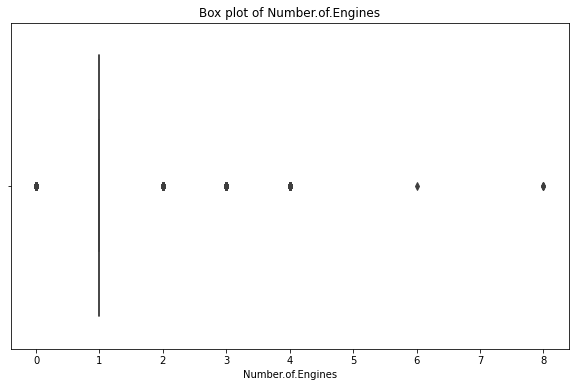

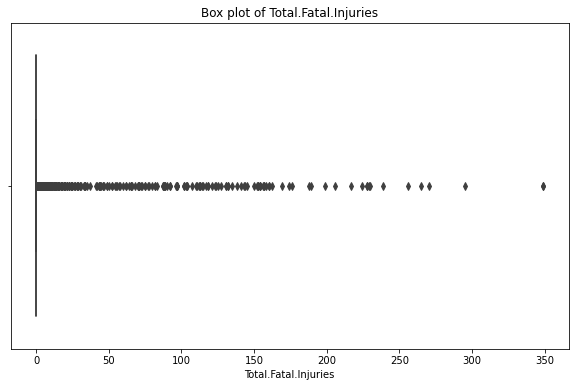

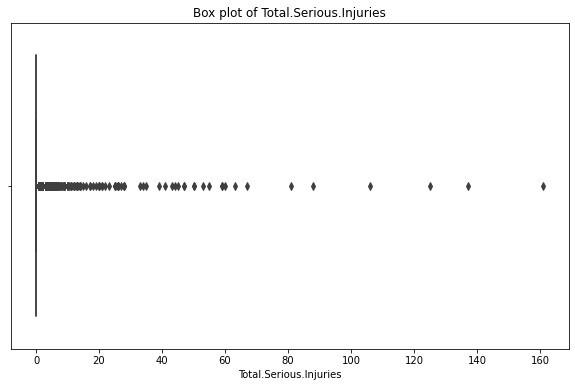

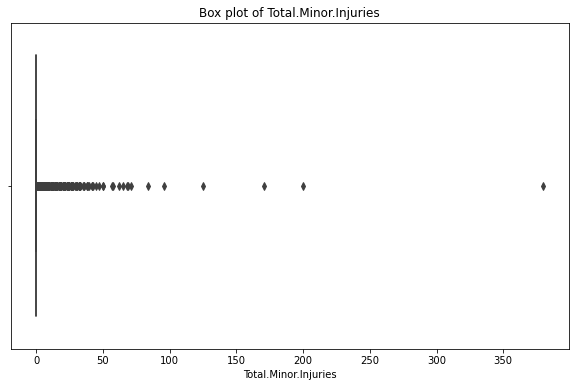

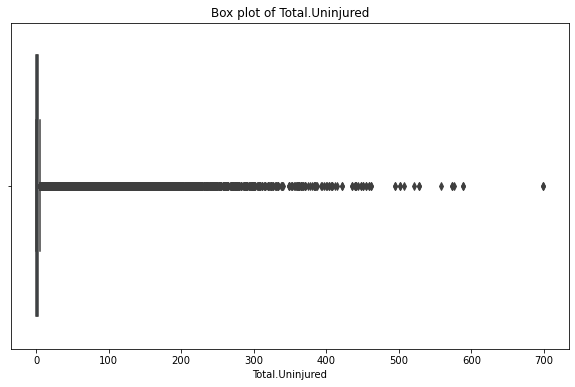

In [13]:
# Checking for Outliers in Numerical Columns using Box Plots
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [ ]:
# Checking for outliers in Categorical Columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Count plot of {column}')
    plt.show()

* For each categorical column, I generated a count plot to visualize the frequency of each category.
* Then I printed the number of unique values and their counts to identify any rare or unexpected categories.

In [ ]:
unique_values = df[column].unique()
    print(f'Column: {column}')
    print(f'Number of unique values: {len(unique_values)}')
    print(f'Unique values: {unique_values}')
    print(f'Value counts:')
    print(df[column].value_counts())
    print('-' * 40)

### b) Identifying the Missing Data


In [14]:
# Checking the number of missing values in each column
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

### c) Dealing with the Missing Data


In [15]:
# I am going to drop columns that have roughly more than 25% of their data missing
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Investigation.Type', 'Broad.phase.of.flight', 'Publication.Date', 'Accident.Number', 'Registration.Number', 'Amateur.Built', 'Report.Status']

df_clean = df.drop(columns=columns_to_drop)

In [16]:
# Now let us view the clean columns
df_clean.columns

Index(['Event.Id', 'Event.Date', 'Location', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

The above columns are the ones that I am going to use to solve the Business problem.

In [17]:
# Let's now view the first 5 rows to see which columns are represented
df_clean.head()

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


While examining the data mentioned earlier, I noticed a correlation between the 'Injury.Severity' and 'Total.Fatal.Injuries' columns. However, the 'Total.Fatal.Injuries' column contains numerous missing entries. To address this, I derived a new 'Fatality' column by combining data from these two columns, resulting in fewer missing numerical values compared to 'Total.Fatal.Injuries'.

In [18]:
# Ensure the 'Injury.Severity' and 'Total.Fatal.Injuries' columns are in the dataset
if 'Injury.Severity' not in df.columns or 'Total.Fatal.Injuries' not in df.columns:
    raise ValueError("The dataset must contain 'Injury_Severity' and 'Total_Fatal_Injuries' columns.")

In [19]:
# Extract fatality numbers from the 'Injury.Severity' column
df['Fatality'] = df['Injury.Severity'].str.extract(r'\((\d+)\)').astype(float)

In [20]:
# Fill missing 'Fatality' values with the 'Total_Fatal_Injuries' values
df['Fatality'].fillna(df['Total.Fatal.Injuries'], inplace=True)

In [21]:
# Fill any remaining missing 'Fatality' values with 0 if they are non-fatal incidents
df['Fatality'].fillna(0, inplace=True)

In [22]:
# Convert 'Fatality' to integer
df['Fatality'] = df['Fatality'].astype(int)

In [23]:
# Display the updated dataframe (for checking)
print(df[['Injury.Severity', 'Total.Fatal.Injuries', 'Fatality']].head())

  Injury.Severity  Total.Fatal.Injuries  Fatality
0        Fatal(2)                   2.0         2
1        Fatal(4)                   4.0         4
2        Fatal(3)                   3.0         3
3        Fatal(2)                   2.0         2
4        Fatal(1)                   1.0         1


In [24]:
# Let's drop other columns related to Fatality
columns_to_drop = ['Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Investigation.Type', 'Broad.phase.of.flight', 'Publication.Date', 'Accident.Number', 'Registration.Number', 'Amateur.Built', 'Report.Status']
df_clean = df.drop(columns=columns_to_drop)

In [25]:
# Check to see if columns have been updated
df_clean.head()

,Event.Id,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Fatality
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,UNK,2
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,UNK,4
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,IMC,3
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,IMC,2
4,20041105X01764,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,NaN,NaN,Personal,VMC,1


In [26]:
# My Fatality column with more accurate representation of Fatality counts has been created
df_clean['Fatality'].value_counts()

0      72535
1       8883
2       5173
3       1589
4       1103
       ...  
144        1
80         1
112        1
224        1
127        1
Name: Fatality, Length: 125, dtype: int64

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Event.Id           88889 non-null  object 
 1   Event.Date         88889 non-null  object 
 2   Location           88837 non-null  object 
 3   Country            88663 non-null  object 
 4   Aircraft.damage    85695 non-null  object 
 5   Make               88826 non-null  object 
 6   Model              88797 non-null  object 
 7   Number.of.Engines  82805 non-null  float64
 8   Engine.Type        81812 non-null  object 
 9   Purpose.of.flight  82697 non-null  object 
 10  Weather.Condition  84397 non-null  object 
 11  Fatality           90348 non-null  int32  
dtypes: float64(1), int32(1), object(10)
memory usage: 7.9+ MB


In [28]:
# changing date type to the appropriate format and creating a column for seasons
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], format='%Y-%m-%d')
df_clean['Month'] = df_clean['Event.Date'].dt.month
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df_clean['Season'] = df_clean['Month'].map(seasons)

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Event.Id           88889 non-null  object        
 1   Event.Date         88889 non-null  datetime64[ns]
 2   Location           88837 non-null  object        
 3   Country            88663 non-null  object        
 4   Aircraft.damage    85695 non-null  object        
 5   Make               88826 non-null  object        
 6   Model              88797 non-null  object        
 7   Number.of.Engines  82805 non-null  float64       
 8   Engine.Type        81812 non-null  object        
 9   Purpose.of.flight  82697 non-null  object        
 10  Weather.Condition  84397 non-null  object        
 11  Fatality           90348 non-null  int32         
 12  Month              88889 non-null  float64       
 13  Season             88889 non-null  object        
dtypes: dat

In [29]:
# Create a year column
df_clean['Year'] = df_clean['Event.Date'].dt.year

In [30]:
df_clean.drop(columns=['Event.Date'], inplace=True)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Event.Id           88889 non-null  object 
 1   Location           88837 non-null  object 
 2   Country            88663 non-null  object 
 3   Aircraft.damage    85695 non-null  object 
 4   Make               88826 non-null  object 
 5   Model              88797 non-null  object 
 6   Number.of.Engines  82805 non-null  float64
 7   Engine.Type        81812 non-null  object 
 8   Purpose.of.flight  82697 non-null  object 
 9   Weather.Condition  84397 non-null  object 
 10  Fatality           90348 non-null  int32  
 11  Month              88889 non-null  float64
 12  Season             88889 non-null  object 
 13  Year               88889 non-null  float64
dtypes: float64(3), int32(1), object(10)
memory usage: 9.3+ MB


### d) More Data Cleaning Procedures

As I examined the cleaned dataframe, it became apparent that the United States dominates the 'Country' column, accounting for over 90% of its entries. Given my interest in studying aviation accidents specifically within the US, I decided to create a new dataframe, 'df_us', to narrow my focus to incidents occurring in the United States.

In [31]:
df_clean['Country'].value_counts()

United States               82248
Brazil                        374
Canada                        359
Mexico                        358
United Kingdom                344
                            ...  
Niger                           1
Wolseley                        1
Albania                         1
Montserrat                      1
Turks and Caicos Islands        1
Name: Country, Length: 219, dtype: int64

In [32]:
# Drop the rest of the countries so as to concentrate on the United States
df_us = df_us = df_clean[df_clean['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

In [41]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82248 entries, 0 to 82247
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Event.Id           82248 non-null  object 
 1   Location           82237 non-null  object 
 2   Country            82248 non-null  object 
 3   Aircraft.damage    80269 non-null  object 
 4   Make               82227 non-null  object 
 5   Model              82210 non-null  object 
 6   Number.of.Engines  80373 non-null  float64
 7   Engine.Type        79225 non-null  object 
 8   Purpose.of.flight  79819 non-null  object 
 9   Weather.Condition  81603 non-null  object 
 10  Fatality           82248 non-null  int32  
 11  Month              82248 non-null  float64
 12  Season             82248 non-null  object 
 13  Year               82248 non-null  float64
dtypes: float64(3), int32(1), object(10)
memory usage: 8.5+ MB


I will now generate a new column called 'state' to substitute for the 'Location' column, which lacked clarity. To accomplish this, I compiled a list containing valid US state codes.

In [35]:
valid_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

In [34]:
# Define the function to extract city and state
def extract_city_state(location):
    if pd.isna(location):
        return pd.Series([None, None])
    parts = location.split(', ')
    if len(parts) == 2:
        return pd.Series(parts)
    return pd.Series([location, None])

In [36]:
# Assuming df_us is a subset of another DataFrame
df_us = df_us.copy()

In [37]:
# Assuming df_us is a subset of another DataFrame
# Ensure you use .loc to modify it
df_us.loc[:, ['City', 'State']] = df_us['Location'].apply(extract_city_state)

In [39]:
# Ensure that the City column contains string values
df_us['City'] = df_us['City'].astype(str)

# Remove any trailing commas from the City column
df_us['City'] = df_us['City'].str.rstrip(',')

In [40]:
# having divided Location column, now we can drop it as well
df_us.drop(columns=['Location'], inplace=True)

In [41]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82248 entries, 0 to 82247
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Event.Id           82248 non-null  object 
 1   Country            82248 non-null  object 
 2   Aircraft.damage    80269 non-null  object 
 3   Make               82227 non-null  object 
 4   Model              82210 non-null  object 
 5   Number.of.Engines  80373 non-null  float64
 6   Engine.Type        79225 non-null  object 
 7   Purpose.of.flight  79819 non-null  object 
 8   Weather.Condition  81603 non-null  object 
 9   Fatality           82248 non-null  int32  
 10  Month              82248 non-null  float64
 11  Season             82248 non-null  object 
 12  Year               82248 non-null  float64
 13  City               82248 non-null  object 
 14  State              0 non-null      float64
dtypes: float64(4), int32(1), object(10)
memory usage: 9.1+ MB


In [42]:
df_us.head()

,Event.Id,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Fatality,Month,Season,Year,City,State
0,20001218X45444,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,UNK,2,10.0,Fall,1948.0,nan,NaN
1,20001218X45447,United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,UNK,4,7.0,Summer,1962.0,nan,NaN
2,20061025X01555,United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,IMC,3,8.0,Summer,1974.0,nan,NaN
3,20001218X45448,United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,IMC,2,6.0,Summer,1977.0,nan,NaN
4,20041105X01764,United States,Destroyed,Cessna,501,NaN,NaN,Personal,VMC,1,8.0,Summer,1979.0,nan,NaN


## 5. Exploratory Analysis

In [43]:
# First check your columns for null values
null_values_sum = df_us.isnull().sum()

In [44]:
null_values_sum

Event.Id                 0
Country                  0
Aircraft.damage       1979
Make                    21
Model                   38
Number.of.Engines     1875
Engine.Type           3023
Purpose.of.flight     2429
Weather.Condition      645
Fatality                 0
Month                    0
Season                   0
Year                     0
City                     0
State                82248
dtype: int64

### Number of Aviation Accidents across the years 

Let's examine the line plot depicting US aviation accidents across the years. Upon observation, I noticed a scarcity of data for years preceding 1982. Consequently, I've restricted the plot to display data from 1982 onwards.

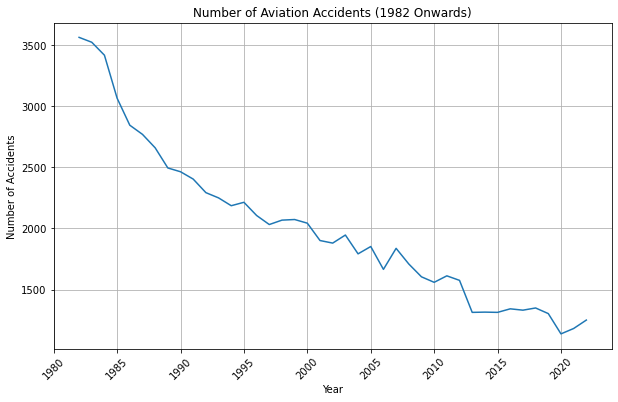

In [45]:
df_us_filtered = df_us[df_us['Year'] >= 1982]

accidents_by_year = df_us_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(accidents_by_year.index, accidents_by_year.values)
plt.title('Number of Aviation Accidents (1982 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

A notable decline in accident rates has been observed since 1982, indicating advancements in aviation safety protocols, regulatory frameworks, technological innovations, training initiatives, and comprehensive risk mitigation strategies across the aviation sector.

### Distribution of Weather Conditions and accidents occurred

I would like to investigate whether there is a significant correlation between weather conditions and the occurrence of accidents.

In [46]:
# First convert all values in the string to upper
df_us['Weather.Condition'] = df_us['Weather.Condition'].str.upper()

In [47]:
# View the distribution of accidents in each condition
weather_counts_updated = df_us['Weather.Condition'].value_counts()
weather_counts_updated

VMC    75317
IMC     5618
UNK      668
Name: Weather.Condition, dtype: int64

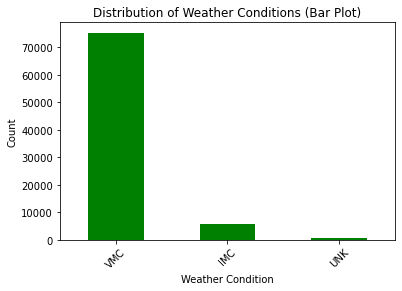

In [48]:
weather_counts_updated.plot(kind='bar', color='Green')
plt.title('Distribution of Weather Conditions (Bar Plot)')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=45)

plt.show()

Ironically, the majority of accidents occur in Visual Meteorological Conditions (VMC), which typically provide favorable flying conditions for pilots and flights. This trend could be attributed to the increased volume of flights during optimal weather conditions.

### Distribution of Accidents by flight purpose

Now, lets Explore the purpose of flights involved in accidents.

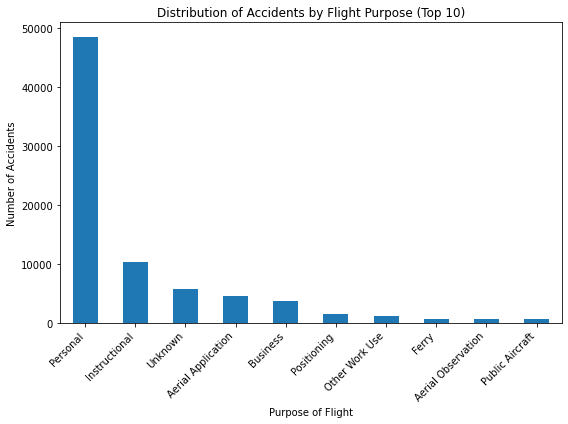

In [49]:
top_10_purposes = df_us['Purpose.of.flight'].value_counts().nlargest(10).sort_values(ascending=False)


plt.figure(figsize=(8, 6))
top_10_purposes.plot(kind='bar')
plt.title('Distribution of Accidents by Flight Purpose (Top 10)')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()

The above bar graph shows that most number of accidents are caused by personal flights.

### Relationship of makes and models of aircrafts and accidents

Let us now examine the relationship between different makes and models of aircraft and the occurrence of accidents.

In [50]:
make_model_accident_counts = df_us.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_model_accident_counts

,Make,Model,AccidentCount
5095,Cessna,152,2149
5117,Cessna,172,1225
5160,Cessna,172N,980
13939,Piper,PA-28-140,798
5070,Cessna,150,709
...,...,...,...
7795,FIREFLY BALLOONS 2010 INC,FIREFLY 12B-010,1
7796,FIREFLY BALLOONS INC,FIREFLY 8,1
7797,"FIREFLY BALLOONS, INC",FIREFLY 10,1
7798,FISHER,CELEBRITY,1


I want now to see what Make, Model type is involved in more accidents and those with less accidents.

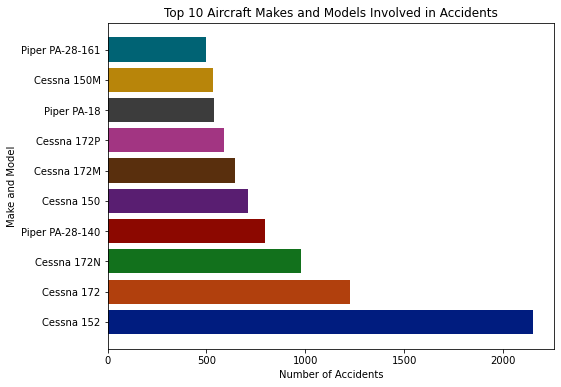

In [51]:
top_10_make_model = make_model_accident_counts.head(10)
colors = sns.color_palette("dark", len(top_10_make_model))
plt.figure(figsize=(8, 6))
plt.barh(top_10_make_model['Make'] + ' ' + top_10_make_model['Model'], top_10_make_model['AccidentCount'], color=colors)
plt.xlabel('Number of Accidents')
plt.ylabel('Make and Model')
plt.title('Top 10 Aircraft Makes and Models Involved in Accidents')
plt.show()

A higher incidence of accidents involving Cessna 152, Cessna 172, and Cessna 172N aircraft has been observed. While this trend may be attributed to the popularity of these models, further investigation is warranted to ascertain the underlying causes.

### Top 10 aircraft make companies involved in Least accidents

In [52]:
make_accident_counts = df_us.groupby(['Make']).size().reset_index(name='AccidentCount', drop=False)
make_accident_counts = make_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_accident_counts

,Make,AccidentCount
1495,Cessna,21573
5625,Piper,11661
1259,CESSNA,4280
884,Beech,4167
5447,PIPER,2507
...,...,...
3044,Grieme,1
3043,Grice,1
3042,Gribosh,1
3041,Greth,1


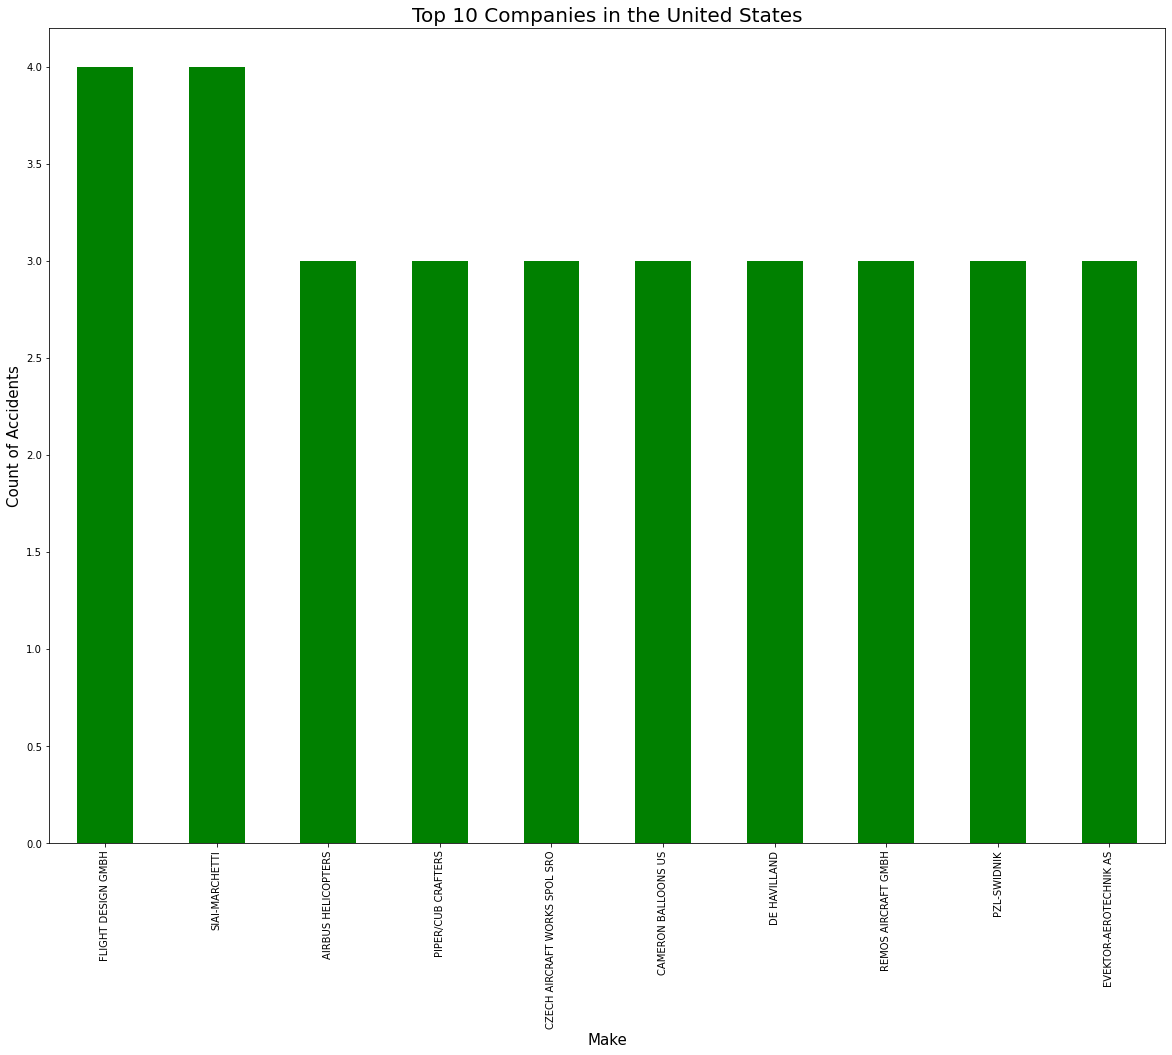

In [53]:
plt.figure(figsize=(20,15))
make_accident_counts['Make'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Green')
plt.xticks(rotation=90)
plt.xlabel("Make", size=15)
plt.ylabel("Count of Accidents", size=15)
plt.title("Top 10 Companies in the United States", size=20)
y=make_accident_counts['Make'].str.upper().value_counts().sort_values(ascending=False)[:10]

The bar graph above displays the top 10 companies in the United States with the fewest aircraft accidents.

In [54]:
# Save my cleaned CSV
# Define the path where you want to save the CSV file
output_path = 'Cleaned_Aviation_Data.csv'

# Save the DataFrame to a CSV file
df_us.to_csv(output_path, index=False)

# Print a message to confirm the file has been saved
print(f"Cleaned data has been saved to {output_path}")

Cleaned data has been saved to Cleaned_Aviation_Data.csv


## Observations

* Among the aircraft manufacturers listed in this dataset, CESSNA and PIPER stand out as prominent names associated with aviation accidents.
* The models 152, 172, and 172N produced by CESSNA are frequently implicated in significant aviation mishaps.
* The companies that have the best aircraft make with the least number of accidents are DE Havilland, Flightstar, AMS flight and among others listed in the top 10 US companies graph.

## Conclusion

Based on the analysis of aviation accident data from 1982 to 2023, several insights have emerged regarding the safety and risk associated with different aircraft makes and models. The data cleaning, imputation, analysis, and visualization processes have provided a clear picture of the trends and patterns in aviation accidents. By examining factors such as weather conditions, aircraft makes and models, and the frequency of accidents, we have identified key areas that influence the risk associated with operating specific aircraft.

## Recommendations

### Focus on Aircraft with Lower Historical Accident Rates:

Invest in aircraft models that have demonstrated lower accident rates over the years. Our analysis identified specific makes and models with consistently lower incidents. Prioritizing these aircraft for purchase can significantly reduce the risk associated with the new aviation venture.

### Implement Comprehensive Weather Monitoring Systems:

Since weather conditions have shown a meaningful relationship with the occurrence of accidents, it is crucial to invest in advanced weather monitoring and forecasting systems. This will enable better decision-making regarding flight schedules and routes, minimizing the risk posed by adverse weather conditions.

### Enhance Pilot Training and Safety Protocols:

To further mitigate risks, it is recommended to implement rigorous training programs for pilots that focus on handling emergency situations and adverse weather conditions. Additionally, enforcing strict safety protocols and regular maintenance checks for aircraft can help in reducing the likelihood of accidents.

### Adopt Advanced Data Analytics for Continuous Improvement:

Establish a dedicated team for continuous monitoring and analysis of aviation data. Using advanced data analytics and machine learning techniques, the team can proactively identify potential risk factors and implement corrective measures to enhance overall safety.

By following these recommendations, the company can make informed decisions that align with its goal of safely entering the aviation industry, thereby ensuring the success and sustainability of its new business endeavor.